# Crime_Project
* Observations and Trends at State Level
* Observations and Trends at Chicago

### Dependencies and Setup

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
sns.set()

pd.set_option('display.max_colwidth', 30)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# Creating Function for the State Geographical location: Northern and Suthern States
def geo_state(df):
    northen_states_list = ['Alaska', 'Connecticut', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Maine', 'Massachusetts',
                       'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'New Hampshire', 'New Jersey',
                       'New York', 'North Dakota', 'Ohio', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Dakota',
                       'Vermont', 'Wisconsin', 'Wyoming']
    df['Geo']='South'
    for row in df.itertuples():
        if row.State in northen_states_list:
            df.loc[row.Index, 'Geo'] = 'North'
    return df

In [3]:
filter_columns = ['State_Name', 'Year', 'Population', 'House_Income', 'Per_Cap_Income', 'Pov_Rate','Unemp_Rate','Geo','Lat','Lng']
states_econ = pd.read_csv('resources/states_total.csv').filter(filter_columns)
states_econ = states_econ[(states_econ['Year'] == 2011)].filter(filter_columns)
year_econ = states_econ.groupby('Year').sum()
year_econ.head()

,Population,House_Income,Per_Cap_Income,Pov_Rate,Unemp_Rate,Lat,Lng
Year,,,,,,,
2011,"306,603,772.00","2,699,586.00","1,410,965.00",686.90,208.40,"2,019.90","-4,767.31"


In [4]:
# Import and Cleaning CDC data
states_deaths = pd.read_csv('resources/ncsh.csv')
states_deaths.drop(states_deaths[states_deaths['State']=='United States'].index, inplace=True)
states_deaths.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
1,2017,Accidents (unintentional i...,Unintentional injuries,Alabama,2703,53.80
2,2017,Accidents (unintentional i...,Unintentional injuries,Alaska,436,63.70
3,2017,Accidents (unintentional i...,Unintentional injuries,Arizona,4184,56.20
4,2017,Accidents (unintentional i...,Unintentional injuries,Arkansas,1625,51.80
5,2017,Accidents (unintentional i...,Unintentional injuries,California,13840,33.20


In [5]:
# Creating DataSet based on number of deaths
states_deaths_tot = states_deaths.drop(['113 Cause Name', 'Age-adjusted Death Rate'], 1)
states_deaths_tot = states_deaths_tot.set_index(['Year', 'State', 'Cause Name'], drop=True).unstack('Cause Name')
states_deaths_tot.columns = states_deaths_tot.columns.get_level_values(1)
states_deaths_tot = states_deaths_tot.rename(columns={
                                            "Alzheimer's disease": 'Alzheimer', 'Heart disease': 'Heart',
                                            'Influenza and pneumonia': 'Pneumonia', 'Kidney disease': 'Kidney',
                                            'Unintentional injuries': 'Injuries'})
states_deaths_tot.head()

Cause Name       All causes  Alzheimer   CLRD  Cancer  Diabetes  Heart  \
Year State                                                               
1999 Alabama          44806        772   2179    9506      1341  13419   
     Alaska            2708         24    146     633        67    563   
     Arizona          40050        963   2553    9006      1063  10800   
     Arkansas         27925        434   1358    6137       691   8315   
     California      229380       4532  13165   53067      6401  71930   

Cause Name       Pneumonia  Kidney  Stroke  Suicide  Injuries  
Year State                                                     
1999 Alabama          1228     979    3148      555      2313  
     Alaska             46      34     171       96       294  
     Arizona          1287     544    2600      766      2214  
     Arkansas          741     458    2255      336      1287  
     California       4560    2261   17962     3077      9198

In [6]:
years_deaths = states_deaths_tot.groupby(states_deaths_tot.index.get_level_values(0)).sum()
years_deaths

Cause Name,All causes,Alzheimer,CLRD,Cancer,Diabetes,Heart,Pneumonia,Kidney,Stroke,Suicide,Injuries
Year,,,,,,,,,,,
1999,2391399,44536,124181,549838,68399,725192,63730,35525,167366,29199,97860
2000,2403351,49558,122009,553091,69301,710760,65313,37251,167661,29350,97900
2001,2416425,53852,123013,553768,71372,700142,62034,39480,163538,30622,101537
2002,2443387,58866,124816,557271,73249,696947,65681,40974,162672,31655,106742
2003,2448288,63457,126382,556902,74219,685089,65163,42453,157689,31484,109277
2004,2397615,65965,121987,553888,73138,652486,59664,42480,150074,32439,112012
2005,2448017,71599,130933,559312,75119,652091,63001,43901,143579,32637,117809
2006,2426264,72432,124583,559888,72449,631636,56326,45344,137119,33300,121599
2007,2423712,74632,127924,562875,71382,616067,52717,46448,135952,34598,123706


In [7]:
deaths_2011 = years_deaths[years_deaths.index == 2011]
deaths_2011

Cause Name,All causes,Alzheimer,CLRD,Cancer,Diabetes,Heart,Pneumonia,Kidney,Stroke,Suicide,Injuries
Year,,,,,,,,,,,
2011,2515458,84974,142943,576691,73831,596577,53826,45591,128932,39518,126438


In [8]:
deaths_2011_adj = deaths_2011/year_econ['Population'].values[0]*100000
deaths_2011_adj

Cause Name,All causes,Alzheimer,CLRD,Cancer,Diabetes,Heart,Pneumonia,Kidney,Stroke,Suicide,Injuries
Year,,,,,,,,,,,
2011,820.43,27.71,46.62,188.09,24.08,194.58,17.56,14.87,42.05,12.89,41.24


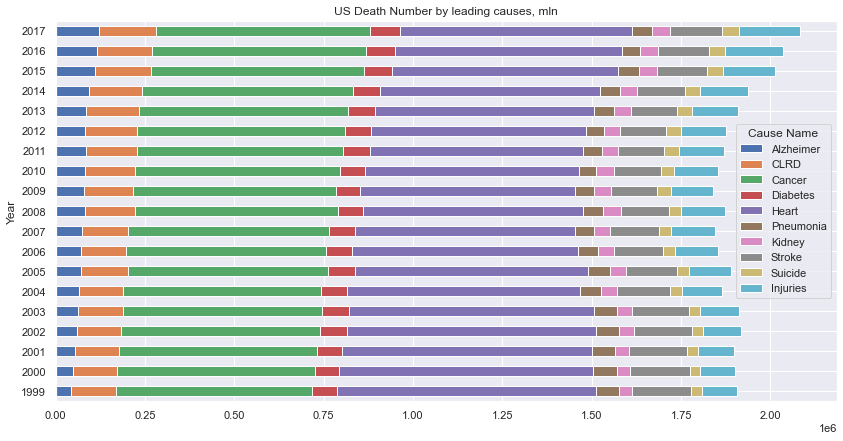

In [9]:
years_deaths_plot = years_deaths.drop('All causes', 1)
_=years_deaths_plot.plot(kind='barh', stacked=True, title="US Death Number by leading causes, mln", figsize=(14, 7))
plt.savefig('../images/us_death_2017.png')

In [10]:
states_deaths_2011 = states_deaths_tot[states_deaths_tot.index.get_level_values(0)==2011]
states_deaths_2011.head()

Cause Name       All causes  Alzheimer   CLRD  Cancer  Diabetes  Heart  \
Year State                                                               
2011 Alabama          48681       1486   2912   10233      1278  11942   
     Alaska            3849         72    194     935       107    739   
     Arizona          48381       2348   3166   10690      1740  10662   
     Arkansas         29653       1002   1985    6497       908   7168   
     California      239942      11555  13357   56449      7695  59772   

Cause Name       Pneumonia  Kidney  Stroke  Suicide  Injuries  
Year State                                                     
2011 Alabama           951    1047    2568      654      2662  
     Alaska             58      53     168      143       385  
     Arizona           690     395    2148     1160      3096  
     Arkansas          727     787    1692      462      1510  
     California       6200    2599   13503     3996     10824

In [11]:
states_deaths_2011 = states_deaths_2011/states_econ['Population'].values[0]*100000
states_deaths_2011.head()

Cause Name       All causes  Alzheimer   CLRD   Cancer  Diabetes    Heart  \
Year State                                                                  
2011 Alabama       1,025.42      31.30  61.34   215.55     26.92   251.55   
     Alaska           81.08       1.52   4.09    19.69      2.25    15.57   
     Arizona       1,019.10      49.46  66.69   225.17     36.65   224.58   
     Arkansas        624.61      21.11  41.81   136.85     19.13   150.99   
     California    5,054.15     243.40 281.35 1,189.04    162.09 1,259.04   

Cause Name       Pneumonia  Kidney  Stroke  Suicide  Injuries  
Year State                                                     
2011 Alabama         20.03   22.05   54.09    13.78     56.07  
     Alaska           1.22    1.12    3.54     3.01      8.11  
     Arizona         14.53    8.32   45.25    24.43     65.21  
     Arkansas        15.31   16.58   35.64     9.73     31.81  
     California     130.60   54.75  284.43    84.17    228.00

In [15]:
states_deaths_2011['State'] = states_deaths_2011.index.get_level_values(1)
states_deaths_2011 = geo_state(states_deaths_2011)
# states_deaths_2011 = states_deaths_2011.drop('State',1)
states_deaths_2011.head()

Cause Name       All causes  Alzheimer   CLRD   Cancer  Diabetes    Heart  \
Year State                                                                  
2011 Alabama       1,025.42      31.30  61.34   215.55     26.92   251.55   
     Alaska           81.08       1.52   4.09    19.69      2.25    15.57   
     Arizona       1,019.10      49.46  66.69   225.17     36.65   224.58   
     Arkansas        624.61      21.11  41.81   136.85     19.13   150.99   
     California    5,054.15     243.40 281.35 1,189.04    162.09 1,259.04   

Cause Name       Pneumonia  Kidney  Stroke  Suicide  Injuries    Geo  \
Year State                                                             
2011 Alabama         20.03   22.05   54.09    13.78     56.07  South   
     Alaska           1.22    1.12    3.54     3.01      8.11  North   
     Arizona         14.53    8.32   45.25    24.43     65.21  South   
     Arkansas        15.31   16.58   35.64     9.73     31.81  South   
     California     130.60   54.75  284.43    84.17    228.00  South   

Cause Name            State  
Year State                   
2011 Alabama        Alabama  
     Alaska          Alaska  
     Arizona        Arizona  
     Arkansas      Arkansas  
     California  California

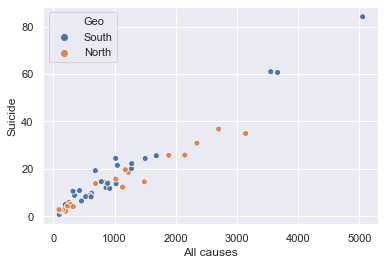

In [16]:
data_plot = states_deaths_2011[['All causes', 'Geo']]
_=sns.scatterplot(states_deaths_2011['All causes'], states_deaths_2011['Suicide'], data = states_deaths_2011, hue='Geo')

In [17]:
states_deaths_2011.to_csv("resources/cdc_analysis.csv", encoding="utf-8", index=False)